### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [59]:
# Add all imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [71]:
data = pd.read_csv('data/coupons.csv')

In [61]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.


1.   Check for duplicates
2.   Summarize stats using source from instructor Toby Gardner



In [48]:
# 2.1 Check for duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Examples of duplicate rows
print("\nExample of duplicate rows:")
print(data[data.duplicated(keep='first')].head())

# Get the percentage of duplicates
duplicate_percentage = (duplicate_count / len(data)) * 100
print(f"\nPercentage of duplicate rows: {duplicate_percentage:.2f}%")

Number of duplicate rows: 36

Example of duplicate rows:
     destination passanger weather  temperature time                 coupon  \
4192        Work     Alone   Sunny           80  7AM  Carry out & Take away   
4236        Work     Alone   Sunny           80  7AM  Carry out & Take away   
4280        Work     Alone   Sunny           80  7AM  Carry out & Take away   
4324        Work     Alone   Sunny           80  7AM  Carry out & Take away   
4409        Work     Alone   Sunny           80  7AM  Carry out & Take away   

     expiration  gender age maritalStatus  ...  CoffeeHouse CarryAway  \
4192         1d    Male  26        Single  ...        never       1~3   
4236         1d    Male  26        Single  ...          gt8       gt8   
4280         1d  Female  26        Single  ...        never       4~8   
4324         1d  Female  46        Single  ...        never       4~8   
4409         1d  Female  21        Single  ...        never     less1   

     RestaurantLessThan20 Res

In [49]:
# Summary Stats. Source from Toby Gardner [https://github.com/toby-gardner-ai/uc-berkeley-aiml-course]
def summary_stats(df) -> pd.DataFrame:

    # Create base frame
    stats = pd.DataFrame(index=df.columns)

    stats["dtype"] = df.dtypes

    stats["sample_val"] = [df[col].dropna().sample(1).iloc[0]
                            if df[col].notna().any() else np.nan
                            for col in df.columns]

    stats["vals"] = df.count()
    stats["miss_pct"] = (df.isna().sum() / len(df) * 100).round(1)
    stats["unique"] = df.nunique()

    # Initiate Descriptive Stats
    for col in ["mean", "mode", "min", "max", "std", "skew", "kurtosis"]:
        stats[col] = np.nan

    # Compute stats for numeric columns
    num_cols = df.select_dtypes(include="number").columns

    for col in num_cols:
        s = df[col].dropna()
        if not s.empty:
            stats.at[col, "mean"] = s.mean()
            stats.at[col, "min"] = s.min()
            stats.at[col, "max"] = s.max()
            stats.at[col, "std"] = s.std()
            stats.at[col, "skew"] = s.skew().round(1)
            stats.at[col, "kurtosis"] = s.kurtosis().round(1)
            mode_vals = s.mode()
            stats.at[col, "mode"] = mode_vals.iloc[0] if not mode_vals.empty else np.nan

    # Rounding preferences for numeric stats (change this to suit dataset)
    round_cols = ["mean", "mode", "min", "max", "std"]
    stats[round_cols] = stats[round_cols].round(2)

    return stats

print(summary_stats(data))
# print (data.dtypes)
print(data.isnull().sum())

                        dtype                sample_val  vals  miss_pct  \
destination            object                      Home  6180       0.0   
passanger              object                     Alone  6180       0.0   
weather                object                     Sunny  6180       0.0   
temperature             int64                        55  6180       0.0   
time                   object                       6PM  6180       0.0   
coupon                 object              Coffee House  6180       0.0   
expiration             object                        1d  6180       0.0   
gender                 object                    Female  6180       0.0   
age                    object                        36  6180       0.0   
maritalStatus          object                    Single  6180       0.0   
has_children            int64                         0  6180       0.0   
education              object  Some college - no degree  6180       0.0   
occupation             ob

3. Decide what to do about your missing data -- drop, replace, other...

In [74]:
# Fix typo in column name "passanger"
data.rename(columns={'passanger': 'passenger'}, inplace=True)

# The duplicate data is not an issue in this situation, so ignoring this.
# The output from summary_stats shows 6 columns containing missing data (car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50). Setting these to "Unknown"
data.fillna('Unknown', inplace=True)
# print(summary_stats(data))

4. What proportion of the total observations chose to accept the coupon?



In [75]:
acc_ratio = data['Y'].mean()
print(f"Accepted coupons ratio: {acc_ratio:.2f}")

Accepted coupons ratio: 0.57


5. Use a bar plot to visualize the `coupon` column.

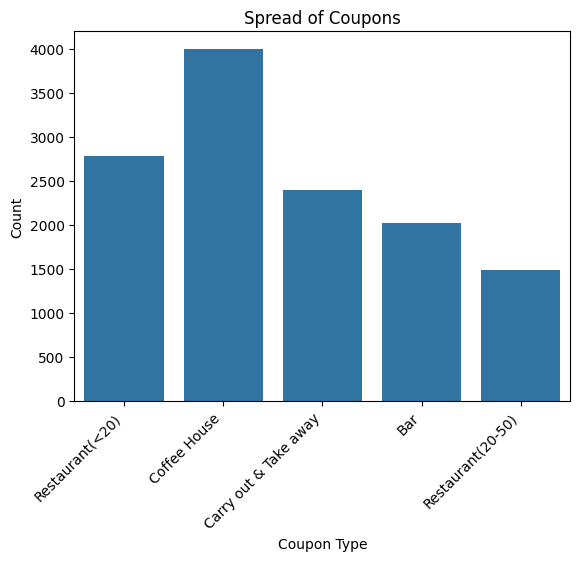

In [65]:
sns.countplot(data=data, x='coupon')
plt.title('Spread of Coupons')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

6. Use a histogram to visualize the temperature column.

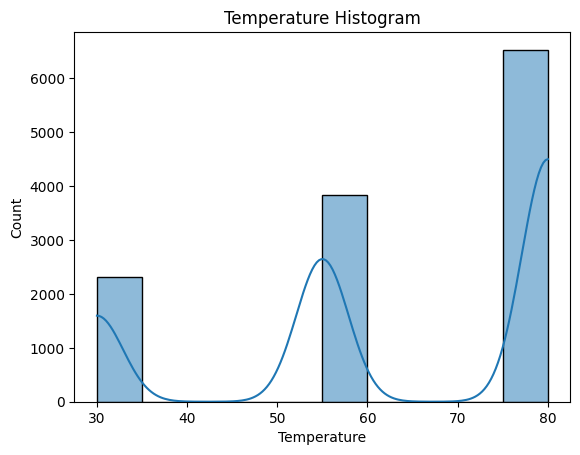

In [66]:
sns.histplot(data=data, x='temperature', bins = 10, kde=True)
plt.title('Temperature Histogram')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [69]:
bardata = data[data['coupon'] == 'Bar']
print(bardata.head())

        destination  passenger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never   Unknown   
13  Female  21  Unmarried partner  ...        never   Unknown   
17  Female  21  Unmarried partner  ...        never   Unknown   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              1~3               

2. What proportion of bar coupons were accepted?


In [73]:
barprop = ((bardata['Y'] == 1).sum()) / len(bardata)
print(f"Proportion of accepted bar coupons:{barprop:.2f}")

Proportion of accepted bar coupons:0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [41]:
accepted_barcoupon_3orfewer = (((bardata['Y'] == 1) & (bardata['Bar'].isin(['never', 'less1', '1~3']) )).sum())
declined_barcoupon_3orfewer = (((bardata['Y'] == 0) & (bardata['Bar'].isin(['never', 'less1', '1~3']) )).sum())
accepted_barcoupon_3greater = (((bardata['Y'] == 1) & (bardata['Bar'].isin(['4~8', 'gt8']) )).sum())
declined_barcoupon_3greater = (((bardata['Y'] == 0) & (bardata['Bar'].isin(['4~8', 'gt8']) )).sum())
print(f"Acceptance rate for those who went to a bar 3 of fewer times a month: {accepted_barcoupon_3orfewer/(accepted_barcoupon_3orfewer+declined_barcoupon_3orfewer):.2f}")
print(f"Acceptance rate for those who went to a bar 4+ times a month: {accepted_barcoupon_3greater/(accepted_barcoupon_3greater+declined_barcoupon_3greater):.2f}")


Acceptance rate for those who went to a bar 3 of fewer times a month: 0.37
Acceptance rate for those who went to a bar 4+ times a month: 0.77


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [17]:
accepted_barcoupon_25yrs_oneplus = (((bardata['Y'] == 1) & (bardata['age'].isin(['31', '36', '41', '46', '50plus'])) & (bardata['Bar'].isin(['1~3', '4~8', 'gt8']) )).sum())
declined_barcoupon_25yrs_oneplus = (((bardata['Y'] == 0) & (bardata['age'].isin(['31', '36', '41', '46', '50plus'])) & (bardata['Bar'].isin(['1~3', '4~8', 'gt8']) )).sum())

accepted_barcoupon_allothers = (((bardata['Y'] == 1) & ~(bardata['age'].isin(['31', '36', '41', '46', '50plus']) & bardata['Bar'].isin(['1~3', '4~8', 'gt8']) )).sum())
declined_barcoupon_allothers = (((bardata['Y'] == 0) & ~(bardata['age'].isin(['31', '36', '41', '46', '50plus']) | bardata['Bar'].isin(['1~3', '4~8', 'gt8']) )).sum())

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {accepted_barcoupon_25yrs_oneplus/(accepted_barcoupon_25yrs_oneplus+declined_barcoupon_25yrs_oneplus):.2f}")
print(f"Acceptance rate for \"all others\" offered a Bar coupon: {accepted_barcoupon_allothers/(accepted_barcoupon_allothers+declined_barcoupon_allothers):.2f}")



Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 0.64
Acceptance rate for "all others" offered a Bar coupon: 0.65


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [23]:
accepted_barcoupon_filtered = (((bardata['Y'] == 1) & (bardata['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bardata['passenger'].isin(['Friend(s)', 'Partner'])) & (~bardata['occupation'].isin(['Farming Fishing & Forestry']))).sum())
declined_barcoupon_filtered = (((bardata['Y'] == 0) & (bardata['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bardata['passenger'].isin(['Friend(s)', 'Partner'])) & (~bardata['occupation'].isin(['Farming Fishing & Forestry']))).sum())

accepted_barcoupon_allothers = (((bardata['Y'] == 1) & (~((bardata['Bar'].isin(['1~3', '4~8', 'gt8']) & bardata['passenger'].isin(['Friend(s)', 'Partner']) & bardata['occupation'].isin(['Farming Fishing & Forestry']))))).sum())
declined_barcoupon_allothers = (((bardata['Y'] == 0) & (~((bardata['Bar'].isin(['1~3', '4~8', 'gt8']) & bardata['passenger'].isin(['Friend(s)', 'Partner']) & bardata['occupation'].isin(['Farming Fishing & Forestry']))))).sum())

print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {accepted_barcoupon_filtered/(accepted_barcoupon_filtered+declined_barcoupon_filtered):.2f}")
print(f"Acceptance rate for all others: {accepted_barcoupon_allothers/(accepted_barcoupon_allothers+declined_barcoupon_allothers):.2f}")

Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 0.72
Acceptance rate for all others: 0.41


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [53]:
c1 = (bardata['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bardata['passenger'].isin(['Friend(s)', 'Partner'])) & (~bardata['maritalStatus'].isin(['Widowed']))
accepted_c1 = ((bardata['Y'] == 1) & c1).sum()
declined_c1 = ((bardata['Y'] == 0) & c1).sum()
arate_c1 = accepted_c1 / (accepted_c1 + declined_c1)

c2 = (bardata['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bardata['age'].isin(['below 21', '21', '26']))
accepted_c2 = ((bardata['Y'] == 1) & c2).sum()
declined_c2 = ((bardata['Y'] == 0) & c2).sum()
arate_c2 = accepted_c2 / (accepted_c2 + declined_c2)

c3 = (bardata['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (bardata['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
accepted_c3 = ((bardata['Y'] == 1) & c3).sum()
declined_c3 = ((bardata['Y'] == 0) & c3).sum()
arate_c3 = accepted_c3 / (accepted_c3 + declined_c3)

c123 = c1 | c2 | c3
accepted_c123 = ((bardata['Y'] == 1) & c123).sum()
declined_c123 = ((bardata['Y'] == 0) & c123).sum()
arate_c123 = accepted_c123 / (accepted_c123 + declined_c123)

print(f"Acceptance rate for Condition 1: {arate_c1:.2f}")
print(f"Acceptance rate for Condition 2: {arate_c2:.2f}")
print(f"Acceptance rate for Condition 3: {arate_c3:.2f}")
print(f"Acceptance rate for Condition 1 or 2 or 3: {arate_c123:.2f}")

Acceptance rate for Condition 1: 0.72
Acceptance rate for Condition 2: 0.73
Acceptance rate for Condition 3: 0.45
Acceptance rate for Condition 1 or 2 or 3: 0.57


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Hypothesis
1. Frequent (4+/month) bar goers acceptance rate was highest at 0.77, however, they represented only a small population of 7.5% (153 participants) of the 2017 bar coupon accepting population. By comparison a larger population 33% (666 participants) were accepted by < 4/month bar goers. It may be that in general, there are far fewer people who frequent bars 4+/month.
2. Acceptance was higher when kids were not passengers.

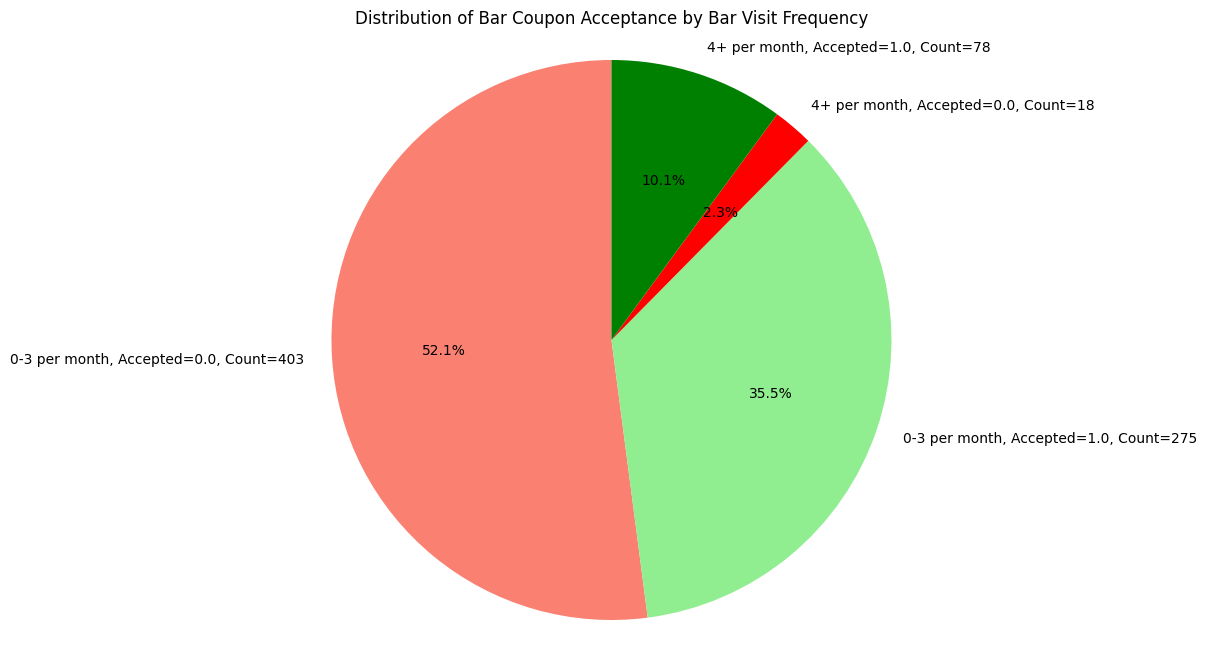

In [35]:
# Create a Pie chart to visually confirm Hypothesis 1

# Create a copy of the data to group data
bar_coupon_data = data[data['coupon'] == 'Bar'].copy()
bar_coupon_data['Bar'] = bar_coupon_data['Bar'].replace({
    'never': '0-3 per month',
    'less1': '0-3 per month',
    '1~3': '0-3 per month',
    '4~8': '4+ per month',
    'gt8': '4+ per month'
})

# Group by and get the counts
bar_acceptance_counts = bar_coupon_data.groupby(['Bar', 'Y']).size().unstack(fill_value=0)

# Convert to series
bar_acceptance_series = bar_acceptance_counts.stack()

# Create labels for the Pie chart
labels = [f'{freq}, Accepted={acc}, Count={count}' for (freq, acc), count in bar_acceptance_series.items()]

# Define colors based on acceptance status (Y)
colors = ['salmon', 'lightgreen', 'red', 'green']

plt.figure(figsize=(10, 8))
plt.pie(bar_acceptance_series, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Bar Coupon Acceptance by Bar Visit Frequency')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

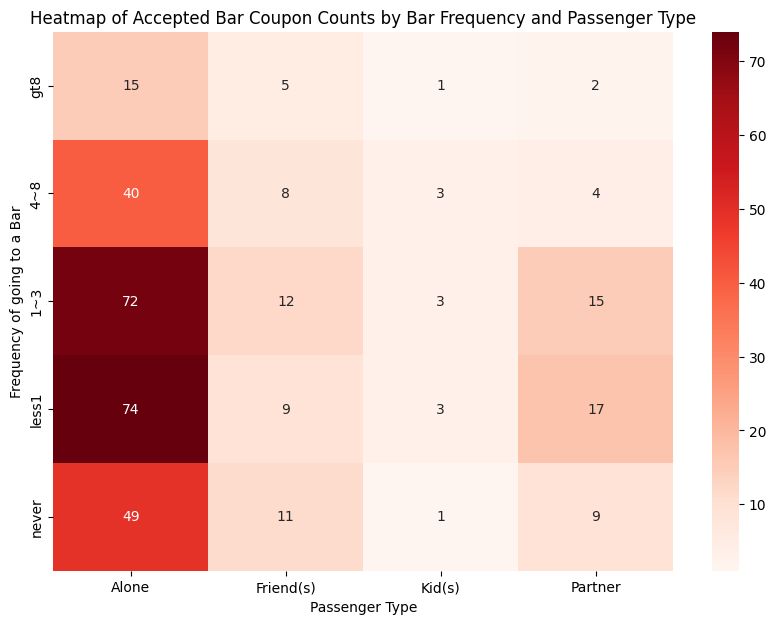

In [37]:
# Filter for accepted bar coupons
accepted_bardata = bardata[bardata['Y'] == 1].copy()

# Create a mapping for 'Bar' frequency for better ordering
bar_order = ['gt8', '4~8', '1~3', 'less1', 'never']
accepted_bardata['Bar'] = pd.Categorical(accepted_bardata['Bar'], categories=bar_order, ordered=True)

# Group by 'Bar' and 'passenger' and count occurrences
bar_passenger_counts = accepted_bardata.groupby(['Bar', 'passenger'], observed=False).size().unstack()

# Create the heatmap, this helps visually confirm the Hypothesis 1.
plt.figure(figsize=(10, 7))
sns.heatmap(bar_passenger_counts, annot=True, fmt='d', cmap='Reds')
plt.title('Heatmap of Accepted Bar Coupon Counts by Bar Frequency and Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Frequency of going to a Bar')
plt.show()

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Analyzing the "Coffee House" coupon data, key hypothesis:
1. Iterating through multiple columns, destination "No Urgent Place" had high acceptance.
2. Heatmap analysis shows that most coffee house coupons were accepted before 2pm, and for destinations other than Home.
3. Heatmap analysis shows that most coffee house coupons were accepted by people who visited coffee houses 1-8 times a month and ordered Carry Out < 8 times a month.



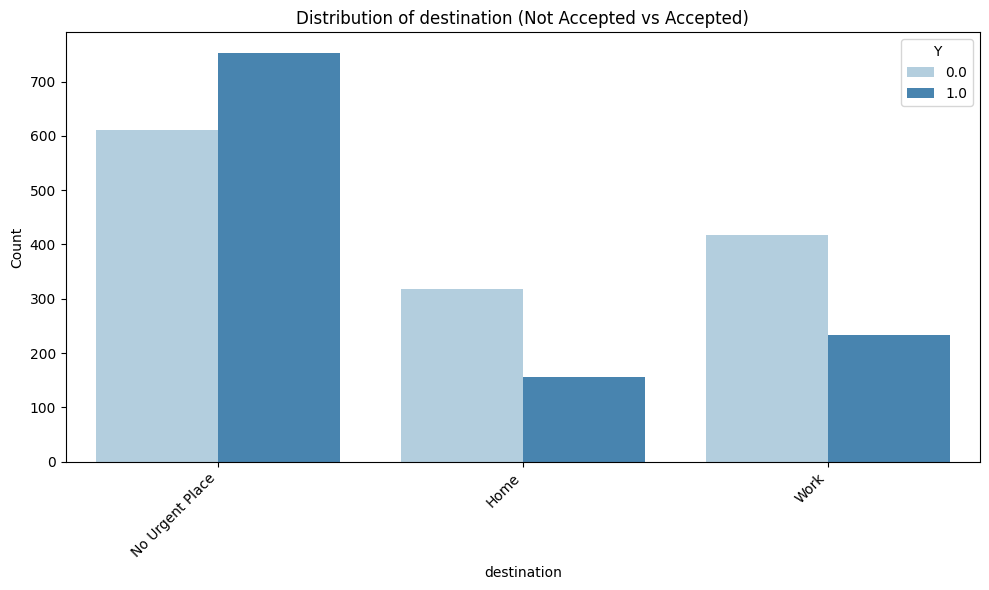

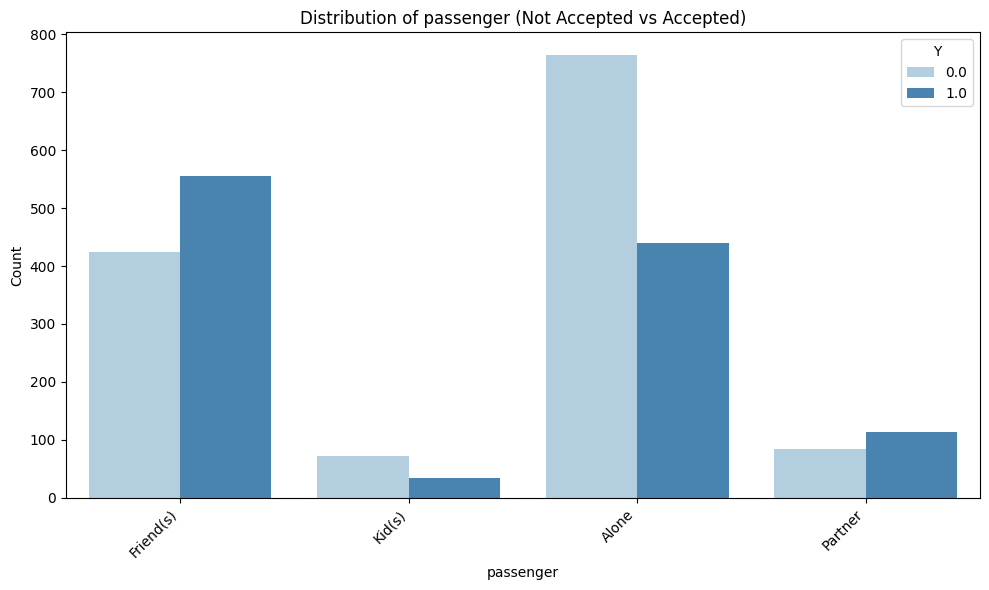

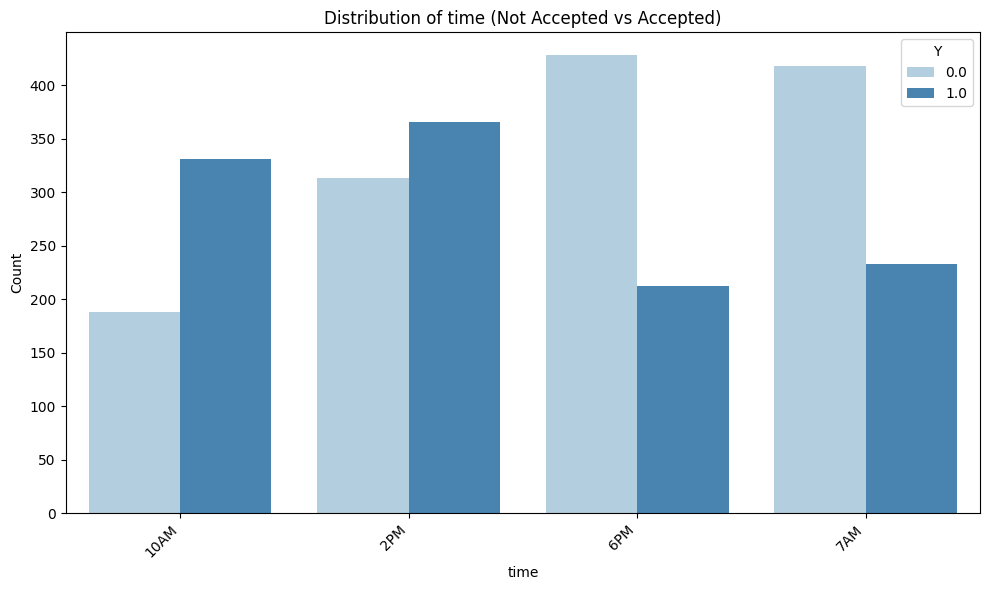

In [14]:
# Iterated through various columns/features, and chose destination, passenger, time to analyze further.
# chosen_features = ['destination', 'temperature', 'passenger', 'time', 'weather', 'CoffeeHouse', 'age', 'income', 'expiration']
chosen_features = ['destination', 'passenger', 'time']
coffee_house_data = data[data['coupon'] == 'Coffee House'].copy()

for feature in chosen_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=coffee_house_data, x=feature, hue='Y', palette='Blues')
    plt.title(f'Distribution of {feature} (Not Accepted vs Accepted)')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

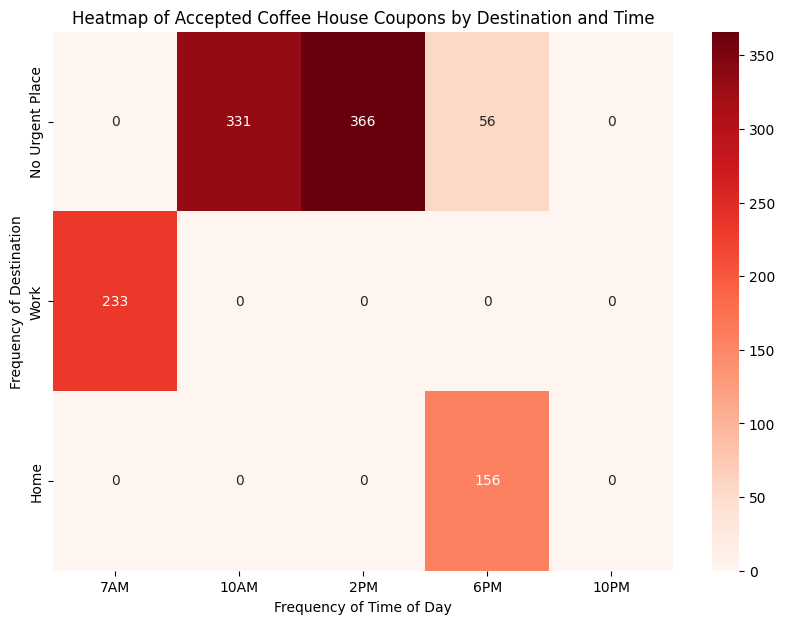

In [30]:
# Further analysis by Heatmap of Destination and Time

# Filter data for Coffee House coupons analysis
coffeehouse_accepted_data = data[(data['coupon'] == 'Coffee House') & (data['Y'] == 1)].copy()

# Setup to order the data
time_slots = ['7AM', '10AM', '2PM', '6PM', '10PM']
destination_types = ['No Urgent Place', 'Work', 'Home']
coffeehouse_accepted_data['destination'] = pd.Categorical(coffeehouse_accepted_data['destination'], categories=destination_types, ordered=True)
coffeehouse_accepted_data['time'] = pd.Categorical(coffeehouse_accepted_data['time'], categories=time_slots, ordered=True)

# Group by destination, time
coffeehouse_destination_counts = coffeehouse_accepted_data.groupby(['destination', 'time'], observed=False).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(coffeehouse_destination_counts, annot=True, fmt='d', cmap='Reds')
plt.title('Heatmap of Accepted Coffee House Coupons by Destination and Time')
plt.xlabel('Frequency of Time of Day')
plt.ylabel('Frequency of Destination')
plt.show()

/tmp/ipython-input-2909342638.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coffeehouse_carryaway_counts = coffeehouse_accepted_data.groupby(['CoffeeHouse', 'CarryAway']).size().unstack(fill_value=0)


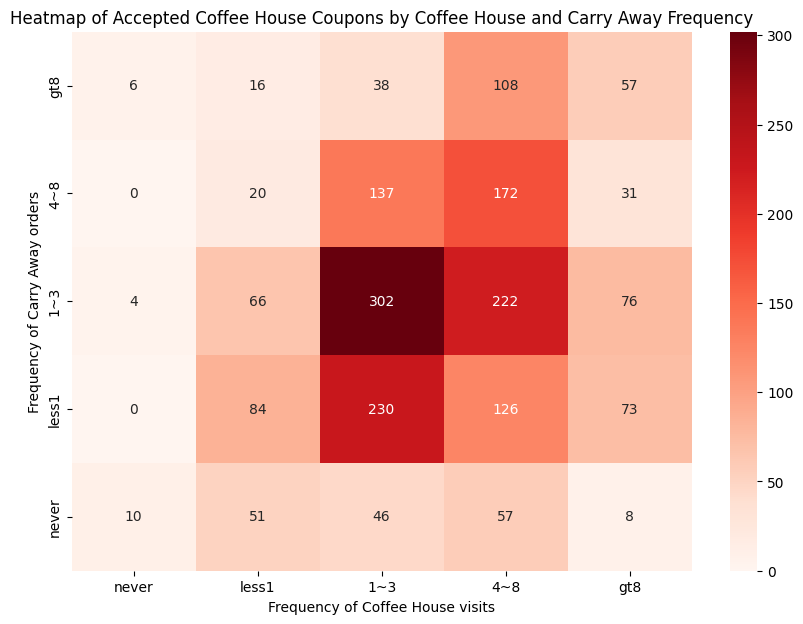

In [44]:
# Further Heatmap analysis of Coffee House visit and Carry-Away frequency

# Filter data for Coffee House coupons analysis
coffeehouse_accepted_data = data[(data['coupon'] == 'Coffee House') & (data['Y'] == 1)].copy()

# Setup to order the data
frequency_order_asc = ['never', 'less1', '1~3', '4~8', 'gt8']
coffeehouse_accepted_data['CoffeeHouse'] = pd.Categorical(coffeehouse_accepted_data['CoffeeHouse'], categories=frequency_order_asc, ordered=True)
coffeehouse_accepted_data['CarryAway'] = pd.Categorical(coffeehouse_accepted_data['CarryAway'], categories=frequency_order_asc, ordered=True)


# Group by CoffeeHouse, CarryAway
coffeehouse_carryaway_counts = coffeehouse_accepted_data.groupby(['CoffeeHouse', 'CarryAway']).size().unstack(fill_value=0)

# Reindex the DataFrame to ensure the desired order for the y-axis
coffeehouse_carryaway_counts = coffeehouse_carryaway_counts.reindex(index=frequency_order)


# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(coffeehouse_carryaway_counts, annot=True, fmt='d', cmap='Reds')
plt.title('Heatmap of Accepted Coffee House Coupons by Coffee House and Carry Away Frequency')
plt.xlabel('Frequency of Coffee House visits')
plt.ylabel('Frequency of Carry Away orders')
plt.show()